In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv("C:/Program Files/R Files/cleaned_data.csv")
df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,singleplayer,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,multiplayer online with strangers,8,16,33.0,USA
2,0,0,0,0,0,0,0,Not difficult at all,2,5,...,Male,28,Employed,Bachelor (or equivalent),Reddit,multiplayer online with online acquaintances...,0,17,11.0,USA
3,2,1,2,2,2,3,2,Very difficult,2,2,...,Male,19,Employed,High school diploma (or equivalent),Reddit,multiplayer online with strangers,14,14,13.0,KOR
4,0,0,0,0,0,1,0,Not difficult at all,3,5,...,Male,24,Employed,Bachelor (or equivalent),Reddit,multiplayer online with real life friends,1,17,13.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12076,1,0,0,1,0,1,1,Not difficult at all,6,6,...,Male,22,Student at college / university,Master (or equivalent),Reddit,multiplayer online with strangers,4,28,7.0,FRA
12077,3,3,3,3,2,3,3,Extremely difficult,5,5,...,Female,20,Student at college / university,High school diploma (or equivalent),Reddit,multiplayer online with strangers,20,23,25.0,USA
12078,0,0,0,0,0,0,0,Not difficult at all,6,6,...,Male,19,Student at college / university,High school diploma (or equivalent),Reddit,multiplayer online with real life friends,0,32,10.0,NOR
12079,3,2,1,3,0,1,3,Somewhat difficult,2,6,...,Female,18,Student at school,High school diploma (or equivalent),Reddit,singleplayer,13,16,32.0,CAN


In [17]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [18]:
X = df_encoded.drop(columns=["GAD_T", "SWL_T", "SPIN_T"])
y_gad = df_encoded["GAD_T"]
y_swl = df_encoded["SWL_T"]
y_spin = df_encoded["SPIN_T"]

In [19]:
X_train, X_test, y_train_gad, y_test_gad = train_test_split(X, y_gad, test_size=0.2, random_state=42)
X_train, X_test, y_train_swl, y_test_swl = train_test_split(X, y_swl, test_size=0.2, random_state=42)
X_train, X_test, y_train_spin, y_test_spin = train_test_split(X, y_spin, test_size=0.2, random_state=42)

In [20]:
gad_model = RandomForestRegressor(n_estimators=100, random_state=42)
gad_model.fit(X_train, y_train_gad)
swl_model = RandomForestRegressor(n_estimators=100, random_state=42)
swl_model.fit(X_train, y_train_swl)
spin_model = RandomForestRegressor(n_estimators=100, random_state=42)
spin_model.fit(X_train, y_train_spin)

RandomForestRegressor(random_state=42)

In [21]:
feature_columns = X.columns
random_sample = {col: np.random.uniform(df_encoded[col].min(), df_encoded[col].max()) for col in feature_columns}
random_sample_df = pd.DataFrame([random_sample])
random_sample_df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,Residence_ISO3
0,2.829057,0.625117,0.964417,2.591642,0.389519,1.150835,0.1694,1.235077,5.006481,6.560779,...,2.581989,0.85596,4.065231,1.43776,21.107116,0.533486,2.818573,1.719133,1.814149,12.642662


In [22]:
gad_prediction = gad_model.predict(random_sample_df)
swl_prediction = swl_model.predict(random_sample_df)
spin_prediction = spin_model.predict(random_sample_df)

In [23]:
print("Random Test Sample:", random_sample_df.to_dict(orient="records"))

Random Test Sample: [{'GAD1': 2.829057005575823, 'GAD2': 0.6251167947055394, 'GAD3': 0.9644172205655256, 'GAD4': 2.5916422844000757, 'GAD5': 0.3895193969414108, 'GAD6': 1.1508350229149853, 'GAD7': 0.16940044288177958, 'GADE': 1.2350774080248206, 'SWL1': 5.006481269419271, 'SWL2': 6.56077866964136, 'SWL3': 3.864946019081076, 'SWL4': 3.926568452342779, 'SWL5': 6.472777581714642, 'Game': 2.472661227849835, 'Platform': 1.0412406207488871, 'Hours': 56.88667795662686, 'earnings': 1.6160932463107158, 'whyplay': 1.9259537970861191, 'League': 5.287544713019864, 'streams': 63.35331186188636, 'SPIN1': 3.7865622612590246, 'SPIN2': 3.61744156020702, 'SPIN3': 3.7973324963280533, 'SPIN4': 1.802256857474534, 'SPIN5': 1.1543133732017217, 'SPIN6': 2.663493189486205, 'SPIN7': 3.9430096260022327, 'SPIN8': 0.7406383292500465, 'SPIN9': 3.7568541550065198, 'SPIN10': 0.998763130670874, 'SPIN11': 2.7096977883328908, 'SPIN12': 2.6387778253266045, 'SPIN13': 0.21050139068226859, 'SPIN14': 2.081898253398064, 'SPIN

In [24]:
print(f"GAD_T Prediction: {gad_prediction[0]:.2f}")
print(f"SWL_T Prediction: {swl_prediction[0]:.2f}")
print(f"SPIN_T Prediction: {spin_prediction[0]:.2f}")

GAD_T Prediction: 8.21
SWL_T Prediction: 24.94
SPIN_T Prediction: 30.69


In [26]:
mental_health_scores = ["GAD_T", "SWL_T", "SPIN_T"]
gaming_behaviors = ["Hours", "Playstyle", "League", "streams"]
demographics = ["Age", "Gender", "earnings"]

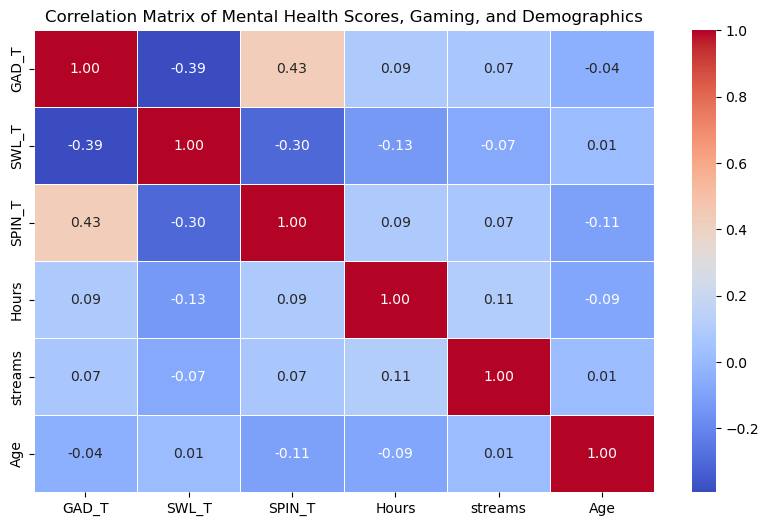

In [29]:
correlation_matrix = df[mental_health_scores + gaming_behaviors + demographics].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Mental Health Scores, Gaming, and Demographics")
plt.show()

In [33]:
for target in mental_health_scores:
    X = df_encoded[gaming_behaviors + demographics]  # Independent variables
    y = df_encoded[target]  # Dependent variable

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Add constant for intercept in OLS regression
    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()
    print(f"Regression Results for {target}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")

Regression Results for GAD_T:
                            OLS Regression Results                            
Dep. Variable:                  GAD_T   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     46.45
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.03e-65
Time:                        20:18:12   Log-Likelihood:                -35632.
No. Observations:               12081   AIC:                         7.128e+04
Df Residuals:                   12073   BIC:                         7.134e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1679 

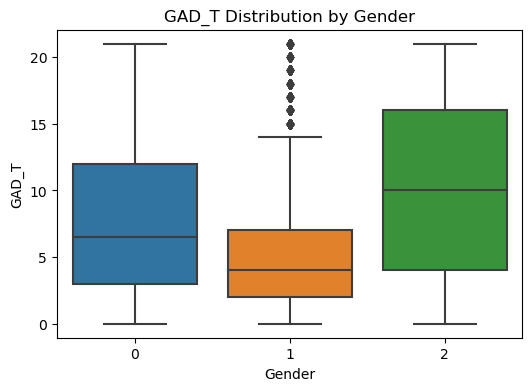

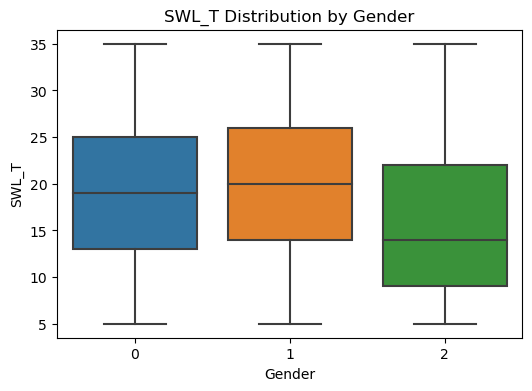

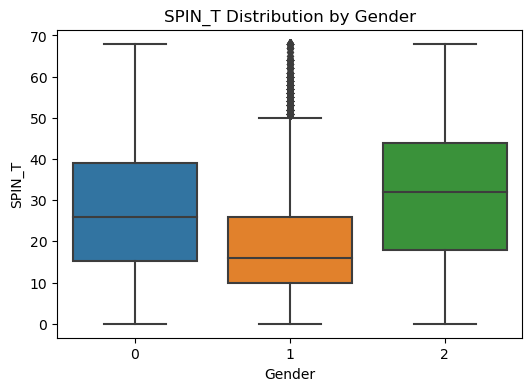

In [34]:
for target in mental_health_scores:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded["Gender"], y=df_encoded[target])
    plt.xlabel("Gender")
    plt.ylabel(target)
    plt.title(f"{target} Distribution by Gender")
    plt.show()

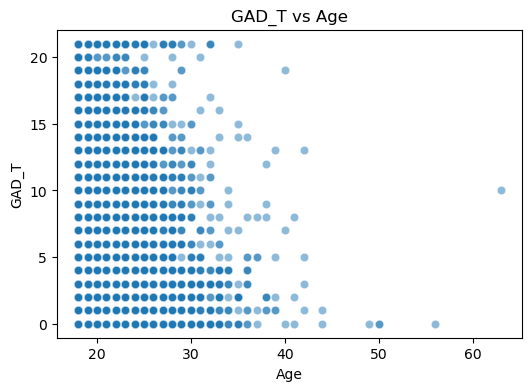

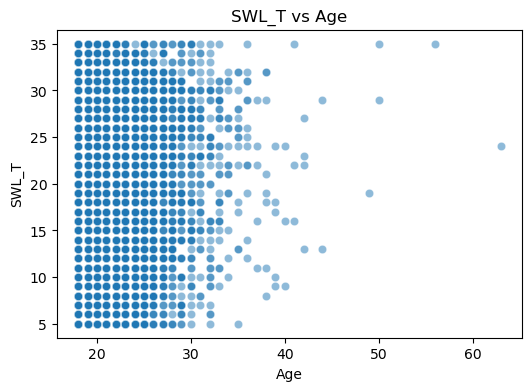

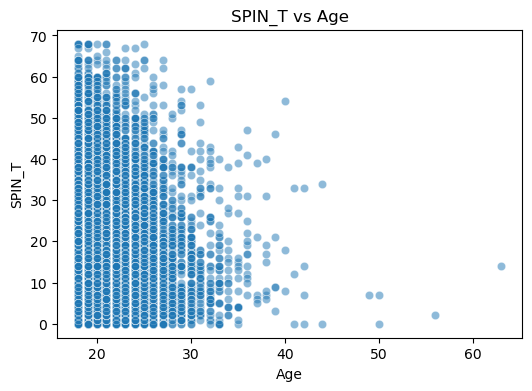

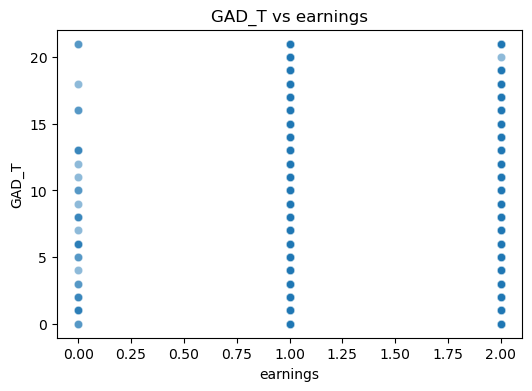

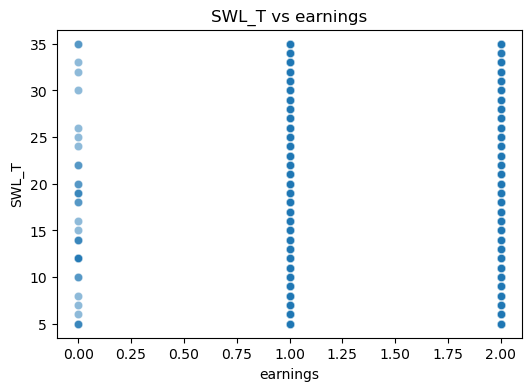

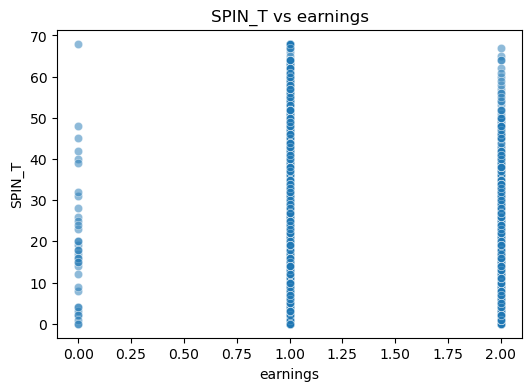

In [35]:
for feature in ["Age", "earnings"]:
    for target in mental_health_scores:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_encoded[feature], y=df_encoded[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"{target} vs {feature}")
        plt.show()